In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expressions
import os
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import spacy
import pyLDAvis.gensim_models
import en_core_web_md #sm/md/lg size
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import warnings

# Increase width of columns on dataframe
pd.set_option('display.max_colwidth', None)
# Visualise inside a notebook
pyLDAvis.enable_notebook()
# Ignore warnings
warnings.filterwarnings('ignore')

/Users/anna_verbytska/Documents/NLP-with-Disaster-Tweets/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data exploration


https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/
https://www.kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
https://www.analyticsvidhya.com/blog/2021/07/15-python-built-in-functions-which-you-should-know-while-learning-data-science/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/
https://www.kaggle.com/discussions/getting-started/254970
https://www.kaggle.com/code/datark1/eda-images-processing-and-exploration#1.-Images-metadata

In [22]:
# Load data from a CSV file into a DataFrame
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_train.head(30)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [4]:
# Fetch the general information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Count unique values in a column 
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [24]:
# Print missing values
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Note: location and keywords info is missing 

In [7]:
# Check the number of unique keywords
len(df_train['keyword'].unique())

222

In [23]:
# Print unique keywords
df_train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Note: keywords may need cleaning

In [26]:
# Count a number of unique values for every keyword 
df_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Note: disasters connected with water, fire, earthquakes, radiation - natural disasters
Conclusion: may need Topic Modelling with BERT for short-length text to identify areas  

In [10]:
# Count the num of locations
len(df_train['location'].unique())

3342

In [39]:
# Print out unique locations
locations = df_train['location'].unique().tolist()
print(locations)

[nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', 'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!', 'Paranaque City', 'Live On Webcam', 'milky way', 'GREENSBORO,NORTH CAROLINA', 'England.', 'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim', 'Abuja', 'USA', 'South Africa', 'Sao Paulo, Brazil', 'hollywoodland ', 'Edmonton, Alberta - Treaty 6', 'Inang Pamantasan', 'Twitter Lockout in progress', 'Concord, CA', 'Calgary, AB', 'San Francisco', 'CLVLND', 'Nashville, TN', 'Santa Clara, CA', 'UK', 'St. Louis, MO', 'Walker County, Alabama', 'Australia', 'North Carolina', 'Norf Carolina', 'San Mateo County, CA', 'Njoro, Kenya', "Your Sister's Bedroom", 'Arlington, TX', 'South Bloomfield, OH', 'New Hanover County, NC', 'Maldives', 'Manchester, NH', 'Wilmington, NC', 'global', 'Alberta | Sask. | Montana', 'Charlotte', 'Baton Rouge, LA', 'Hagerstown, MD', 'Gloucestershire , UK', 'Nairobi, Kenya', 'Instagram - @heyimginog ', '304', 'Switzerland', 'US', 'Somewhere Onl

Note: location column may need cleaning (punctuations e.g. !!, | ,etc., digits if not lantitude, irrelevant or too general info e.g. 'milky way', 'Twitter Lockout in progress', "Your Sister's Bedroom", 'VISIT MY YOUTUBE CHANNEL.', etc.)

In [33]:
# Check one tweet
df_train['text'][32]

'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw'

In [34]:
# Count a num of unique tweets
len(df_train['text'].unique())

7503

In [14]:
# Print the longest tweet
print("The longest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).max()))

The longest tweet has: 31 words


In [35]:
# Print the shortest tweet
print("The shortest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).min()))

The shortest tweet has: 1 words


## Data Preprocessing

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#Function to remove irrelevant data
def clean_tweet(tweet):

    """
    Regex expressions website https://regex101.com/
    """

    # Capital letters to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove user mentions
    tweet = re.sub(r'@[^\s]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Remove punctuation
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    # Remove #RT
    tweet = re.sub(r'\b(rt)\b','',tweet)
    # Remove words containing numbers
    tweet = re.sub('\w*\d\w*' , '', tweet)
    # Remove single characters
    tweet = re.sub(r'\b[a-zA-Z]\b','',tweet)
    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

    return tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anna_verbytska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Replace tweets with clean text
df_train['text'] = [clean_tweet(tweet) for tweet in df_train['text']]

In [44]:
#Function to remove irrelevant data
def clean_location(location):

    """
    Regex expressions website https://regex101.com/
    """

    location = str(location)
    # Capital letters to lowercase
    location = location.lower()
    # Remove URLs
    location = re.sub(r'http\S+', '', location)
    # Remove user mentions
    location = re.sub(r'@[^\s]+', '', location)
    # Remove hashtags
    location = re.sub(r'#([^\s]+)', r'\1', location)
    # Remove punctuation
    location = re.sub('[%s]' % re.escape(string.punctuation), '', location)
    # Remove #RT
    location = re.sub(r'\b(rt)\b','',location)
    # Remove words containing numbers
    location = re.sub('\w*\d\w*' , '', location)
    # Remove single characters
    location = re.sub(r'\b[a-zA-Z]\b','',location)
    # Remove stopwords
    location = ' '.join([word for word in location.split() if word not in stop_words])
    

    return location

In [46]:
# Replace tweets with clean text
df_train['location'] = [clean_location(location) for location in df_train['location']]

In [42]:
#df_train['location']=df_train['location'].str.replace("$", "S")

## Data Visualisation

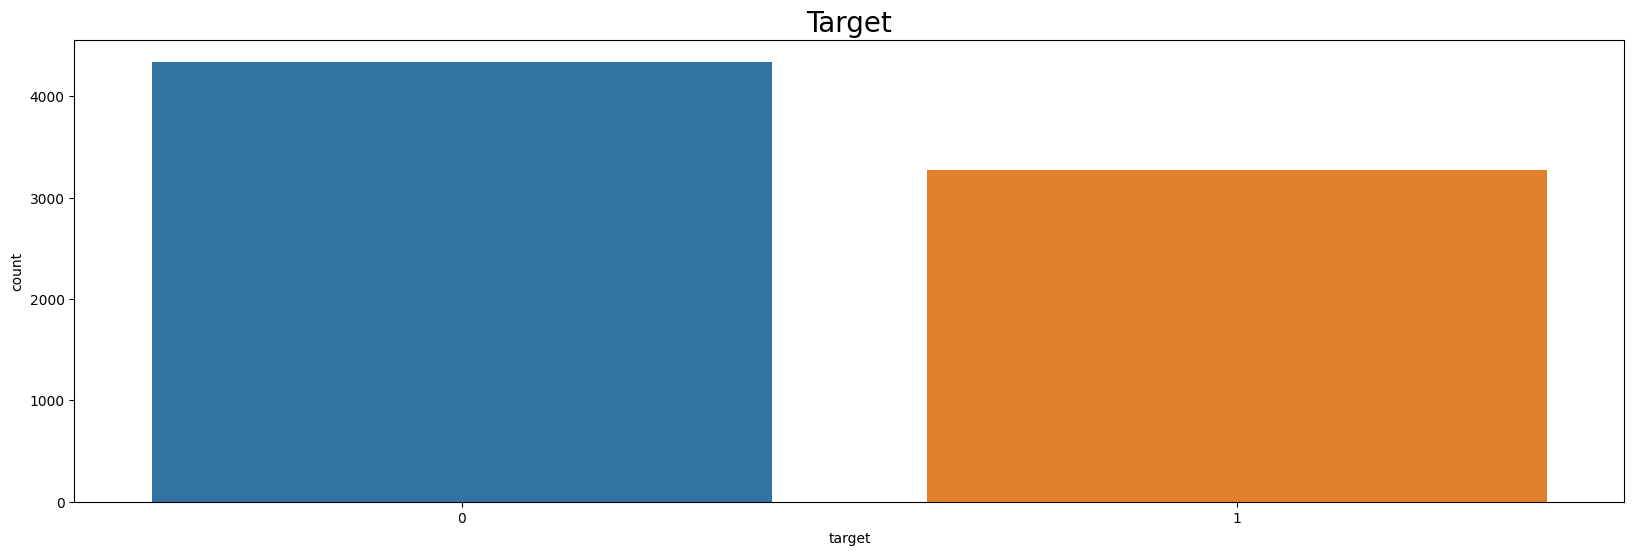

In [62]:
# Check if data is balanced
plt.figure(figsize=(20, 6))
ax = sns.countplot(x=df_train["target"])
ax.set_title("Target", fontsize=20)
plt.show()

## Feature Engineering

#### Keyword extraction with KeyBERT

https://www.geeksforgeeks.org/keyword-extraction-methods-in-nlp/

In [ ]:
#Installation

!pip install keybert
from keybert import KeyBERT

# Initialize the KeyBERT model
model = KeyBERT('distilbert-base-nli-mean-tokens')

# Example text
text = """
         Transformers provides thousands of pre-trained models to perform tasks on texts such as classification, 
         information extraction, question answering, summarization, translation, text generation, etc. 
         Each architecture is designed with a specific task in mind.
       """

# Extract keywords
keywords = model.extract_keywords(text)

# Print the keywords
print("Keywords:")
for keyword in keywords:
    print(keyword)

#### Extract locations with NER

In [ ]:
# Import the spaCy model
nlp = en_core_web_md.load()

In [ ]:
# Stopwords set defined
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alfonso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
# Import training dataset
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_train.head(50)

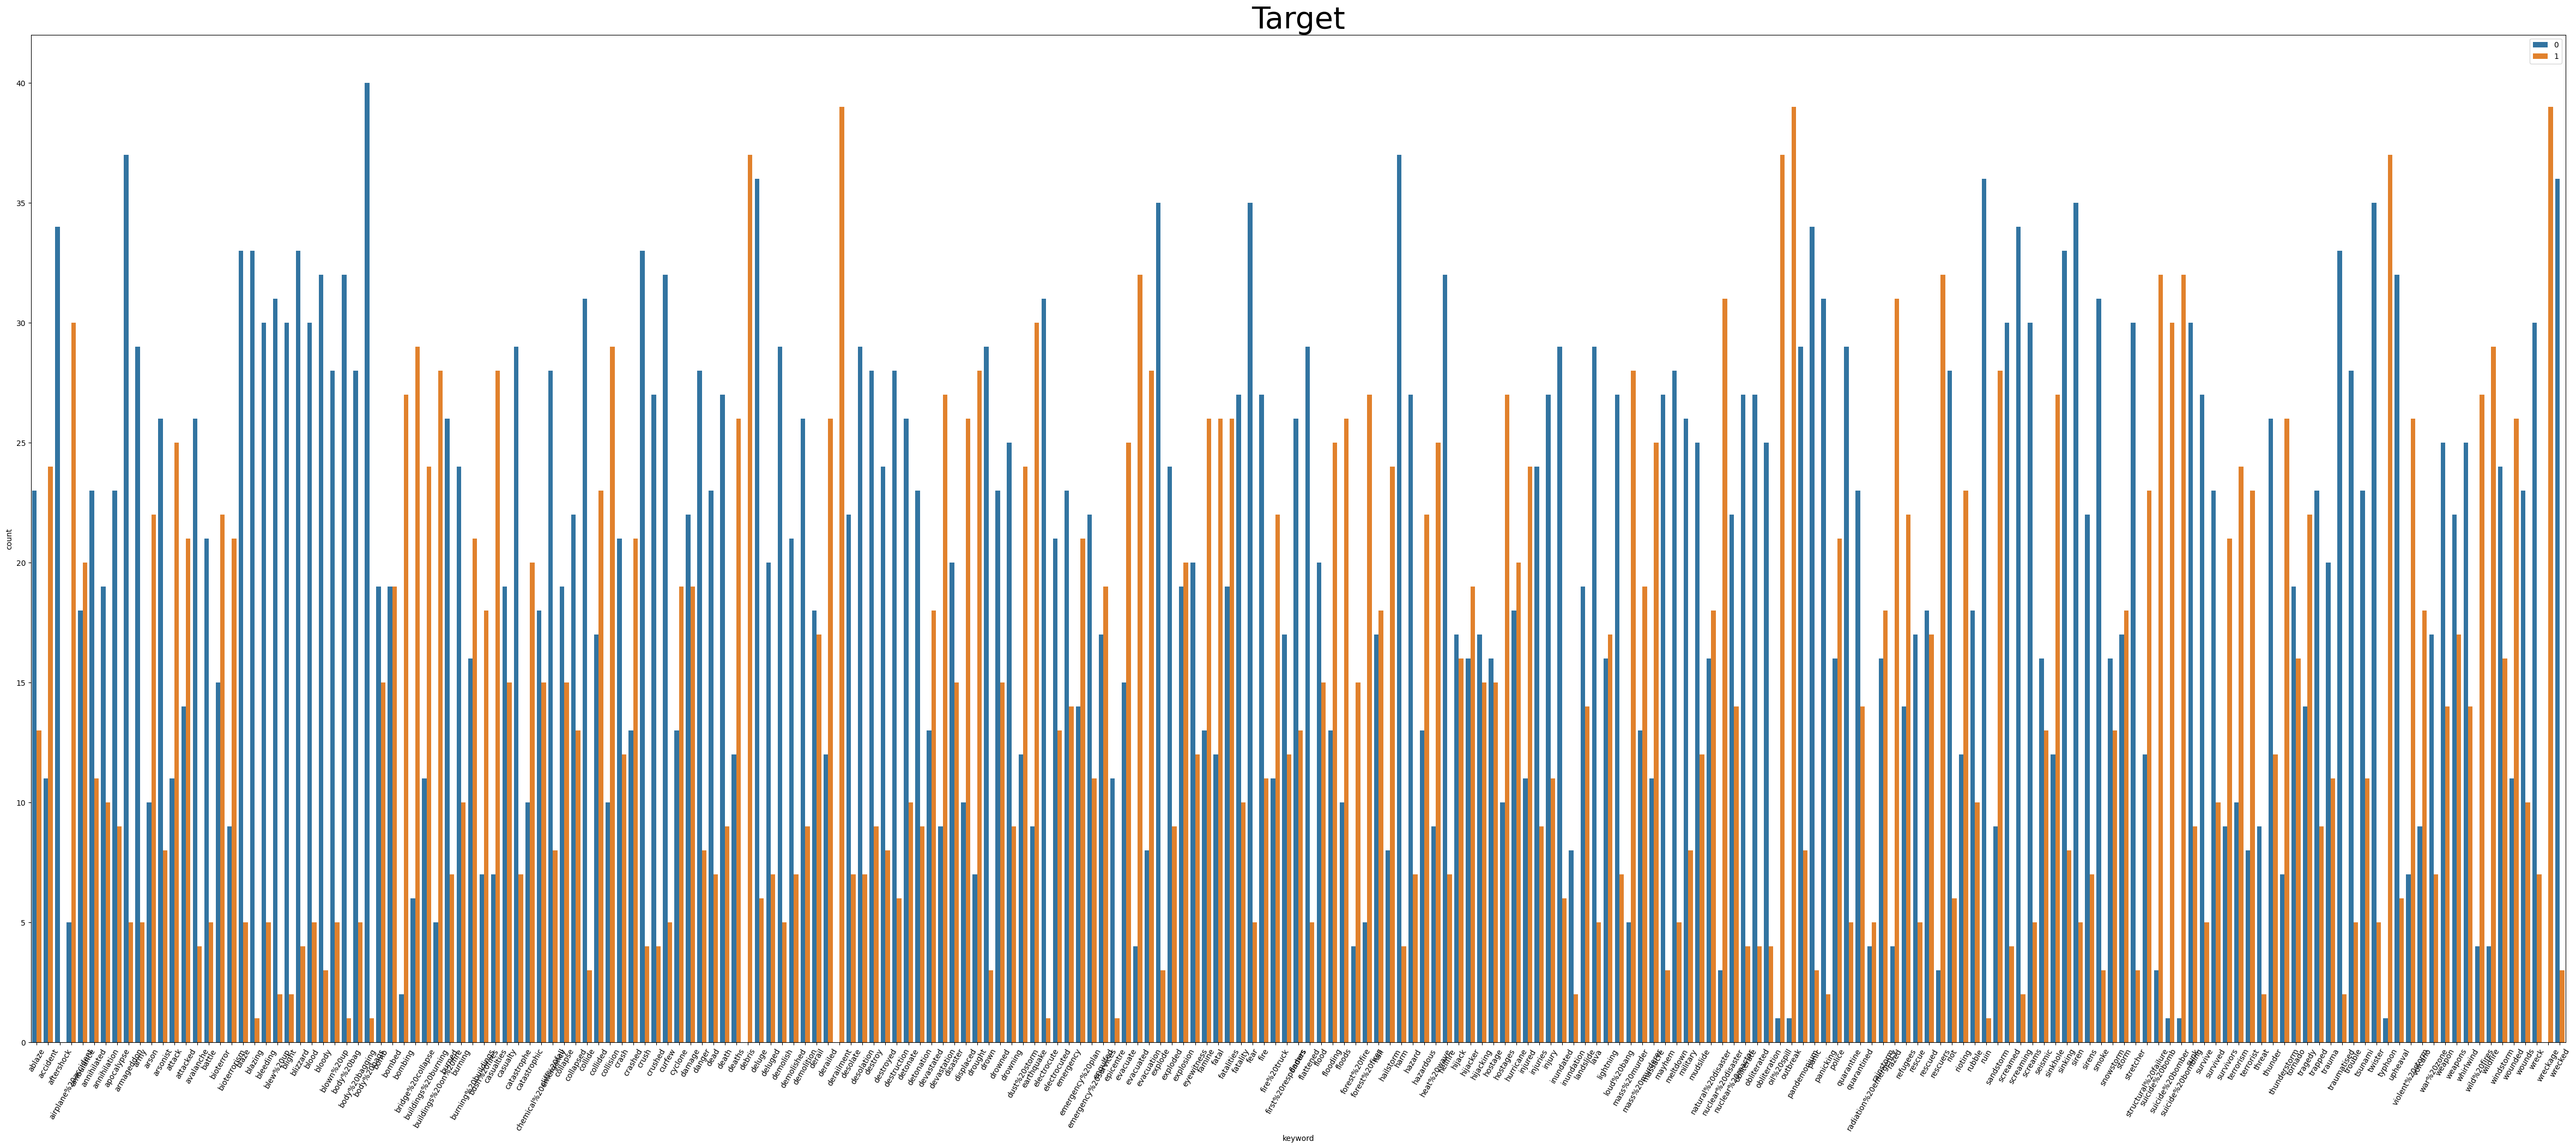

In [63]:
# Countplot depending on keywords
plt.figure(figsize=(60, 24))
ax = sns.countplot(x="keyword",hue="target", data=df_train)
ax.set_title("Target", fontsize=40)
# rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.legend()    
plt.show()